# Nomor 1


In [14]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [15]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [16]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


In [17]:
price2

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [18]:
price2.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [19]:
quartile_1 = price2["House_Price"].quantile(0.25)
quartile_3 = price2["House_Price"].quantile(0.75)
range = quartile_3 - quartile_1

outliers = price2["House_Price"] > 1.5 * range + quartile_3
data_outliers = price2.loc[outliers]

In [20]:
data_outliers # Sehingga didapat outliers nya terdapat pada baris ke 678 dengan data berikut

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


In [35]:
price3 = price2[price2["House_Price"] <= 1.5 * range + quartile_3] # Kita meremove outliernya 
price3

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [37]:
quartile_1 = price3["House_Price"].quantile(0.25)
quartile_3 = price3["House_Price"].quantile(0.75)
range = quartile_3 - quartile_1

outliers = price3["House_Price"] > 1.5 * range + quartile_3
data_outliers = price3.loc[outliers]
data_outliers
# Sehingga sekarang sudah tidak ada outlier lagi pada dataframe

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


# Nomor 2


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
try:
    # Running Locally 
    df = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    df = pd.read_csv('data/price.csv')

--2021-04-14 07:29:30--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.004s  

2021-04-14 07:29:30 (12.3 MB/s) - ‘data/price.csv’ saved [53592/53592]



In [3]:
df

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [4]:
Q1 = df['House_Price'].quantile(0.25)
Q3 = df['House_Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 = {}, Q3 = {}, IQR = {}".format(Q1, Q3, IQR))

Q1 = 4661000.0, Q3 = 7187250.0, IQR = 2526250.0


In [5]:
 Lower_limit = Q1 - 1.5*IQR
 Upper_limit = Q3 + 1.5*IQR
 print("Lower_limit = {}, Upper_limit = {}".format(Lower_limit, Upper_limit))

Lower_limit = 871625.0, Upper_limit = 10976625.0


In [6]:
 #mendeteksi outliersoutliers_ = df[(df.House_Price<Lower_limit)|(df.House_Price>Upper_limit)]
 outliers_ =  df[(df.House_Price<Lower_limit)|(df.House_Price>Upper_limit)]
 outliers_

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
360,361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,150000000
678,679,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000
811,812,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [7]:
# membuang semua outliers
df_no_outliers = df[(df.House_Price>Lower_limit)&(df.House_Price<Upper_limit)]
df_no_outliers

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


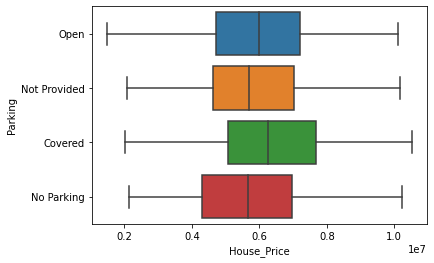

In [8]:
#boxplot tanpa outliers
p = sns.boxplot(x="House_Price", y="Parking", data= df_no_outliers) 

In [9]:
#mengeluarkan outliers bawah
df_no_lower_outliers = df[(df.House_Price>Lower_limit)]

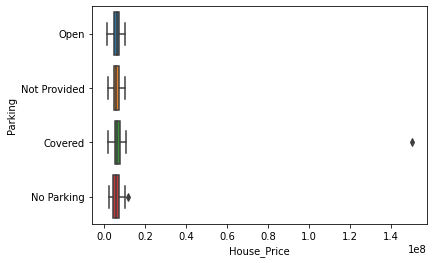

In [10]:
#boxplot tanpa outliers bawah
p = sns.boxplot(x="House_Price", y="Parking", data= df_no_lower_outliers) 

# Nomor 3

In [40]:
#mengimport modul yang akan digunakan
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [41]:
#mengimport data yang akan digunakan
tips = sns.load_dataset('tips')

Nomor 1 : Adakah tipe variabel yang kurang tepat di data tersebut?

In [42]:
#memeriksa tipe variabel data
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Kesimpulan: Berdasarkan pemeriksaan diatas, terlihat bahwa data "day" dan "time" memiliki tipe variabel category. Semenetara, "day" dan "time" merupakan data time series maka seharusnya memiliki tipe variabel datetime64.

Nomor 2 : Apakah data numeriknya cenderung berdistribusi normal?

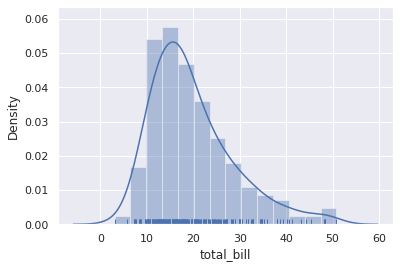

In [43]:
#memeriksa distribusi dari data total_bill
tips.mean()
p = sns.distplot(tips['total_bill'], kde=True, rug=True)

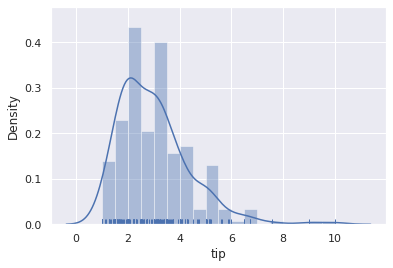

In [44]:
#memeriksa distribusi dari data tip
tips.mean()
q = sns.distplot(tips['tip'], kde=True, rug=True)

Kesimpulan: Berdasarkan visualisasi dan perhitungan rata-rata di atas, terlihat bahwa nilai rata ratanya bukan merupakan titik puncak kurva.  Secara gambar juga terlihat kurvanya tidak berbentuk lonceng/tidak simetris. Maka, data numeriknya tidak berdistribusi normal.

Nomor 3 : Apakah ada *outlier*, *noise*, *missing values*, dan/atau duplikasi data?

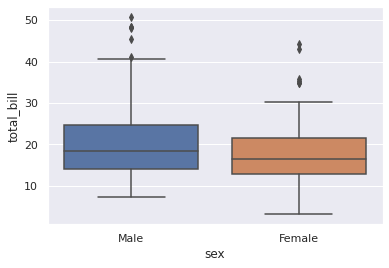

In [45]:
#memeriksa keberadaan outlier
r = sns.boxplot(x="sex", y="total_bill", data=tips)

Kesimpulan: Berdasarkan visualisasi di atas, terlihat terdapat beberapa outlier pada data.

In [46]:
#memeriksa keberadaan missing values
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Kesimpulan: Tidak ada *missing values*.

In [47]:
#memeriksa keberadaan duplikasi data
tips.duplicated().sum()

1

Kesimpulan: Terdapat duplikasi data berjumlah satu buah.

In [48]:
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [49]:
tips = sns.load_dataset('tips')
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Nomor 4 : Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

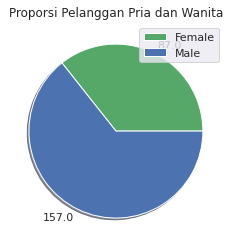

In [50]:
data = tips['sex']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['g', 'b']
labels = proporsion.keys()
plt.pie(values, colors=colors, labels= values, shadow=True)
plt.title('Proporsi Pelanggan Pria dan Wanita')
plt.legend(labels,loc='best')
plt.show()

Dengan menggunakan visualisasi data satu dimensi dalam bentuk *pie chart*, didapatkan pelanggan total 244 dengan pelanggan pria sebesar 157 orang dan pelanggan wanita sebesar 87 orang. Dengan pria memiliki rasio hampir 2/3 dari total pelanggan, maka dapat disimpulkan bahwa pelanggan pria dan wanita tidak proporsional (unbalance)

Nomor 5 : Dari data yang ada apakah pria atau wanita ada kecenderungan memberi tips lebih besar?

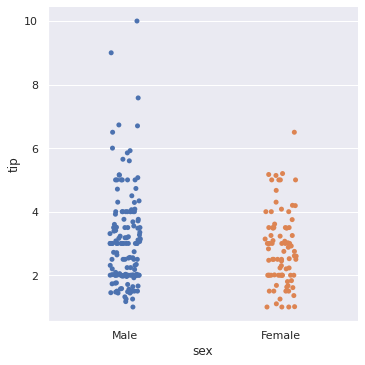

In [51]:
p = sns.catplot(x = "sex",y = "tip", data = tips )

Dengan menggunakan visualiasi data *scatter plot*, dapat dilihat sebaran pemberian tips berdasarkan sex. Pria cenderung memberi tips lebih besar daripada wanita dengan tips maksimal pria 10, sedangkan wanita 6-7. Namun, rata-rata pemberian tips pria maupun wanita sama karena pada data tips terdapat  outlier.

Nomor 6 :  Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

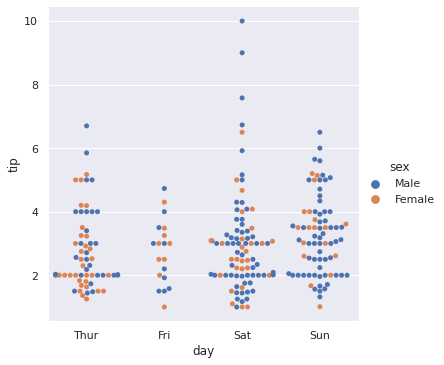

In [52]:
p = sns.catplot(x = "day", y = "tip", hue ="sex", kind = "swarm", data = tips)

Dengan menggunakan visualisasi data *swarm plot*, bisa dilihat sebaran tips berdasarkan hari dan sex. Berdasarkan visualisasi data, tips pada hari sabtu dan minggu cenderung lebih besar dibanding hari-hari lainnya. Dengan hari jumat memiliki pemberian tips paling rendah, rataan pemberian tips pada hari-hari lainnya cenderung mirip atau sama.

In [53]:
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.set()

tips = sns.load_dataset('tips')

Nomor 7 : Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

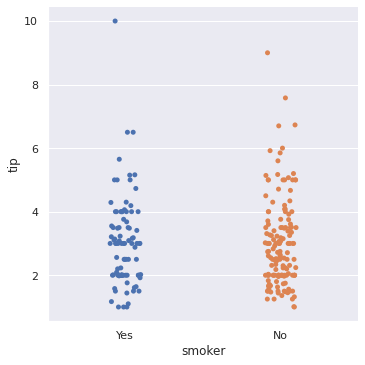

In [54]:
sns.catplot(x = 'smoker', y = 'tip', data = tips)

Kesimpulan: tidak ada kecenderungan bahwa customer perokok memberi tip lebih besar karena kedua tipe cutomer tidak menunjukkan perbedaan yang signifikan dalam pemberian tip.

Nomor 8 :  Apakah pola di nomer 5 dan 7 dipengaruhi hari?

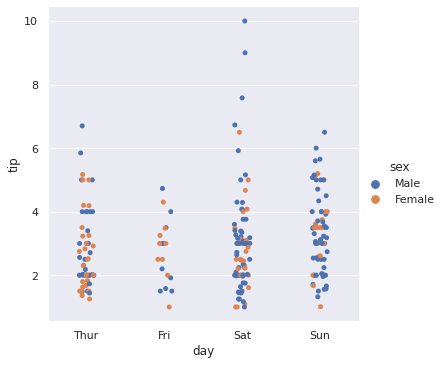

In [55]:
#No 5
sns.catplot(x = 'day', y = 'tip', hue = 'sex', data = tips)

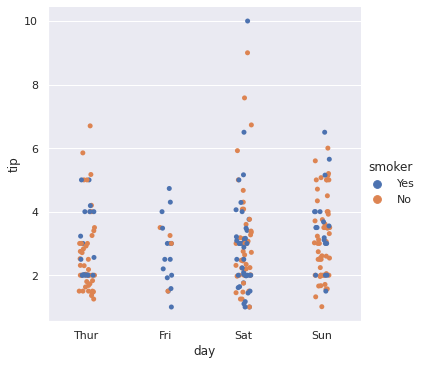

In [56]:
#No 7
sns.catplot(x = 'day', y = 'tip', hue = 'smoker', data = tips)

Kesimpulan: Pola di nomor 5 dan 7 keduanya dipengaruhi oleh hari karena berdasarkan visualisasi di kedua nomor tersebut, lebih banyak customer yang memberikan tip di akhir pekan.

Nomor 9 :  Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

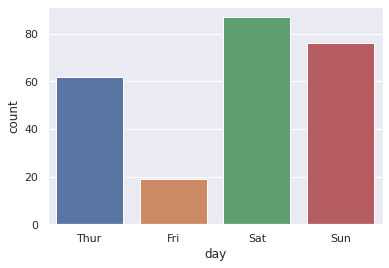

In [57]:
sns.countplot(x = 'day', data = tips)

Terdapat lebih banyak customer di akhir pekan.

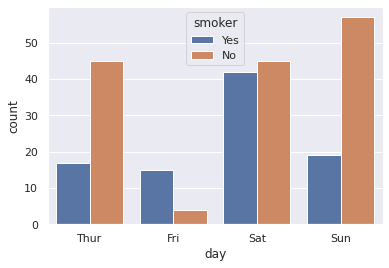

In [58]:
sns.countplot(x = 'day', hue = 'smoker', data = tips)

Customer bukan perokok lebih banyak daripada perokok.

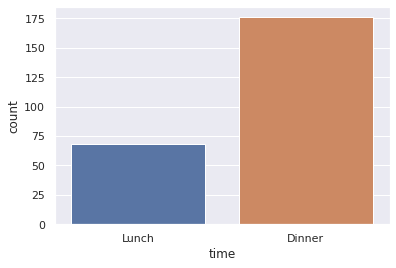

In [59]:
sns.countplot(x = 'time', data = tips)

Terdapat lebih banyak customer yang datang pada jam makan malam.

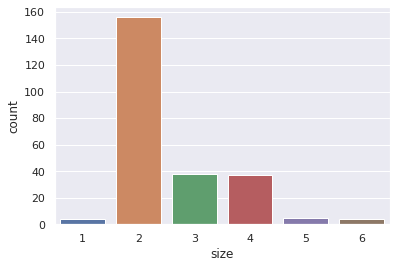

In [60]:
sns.countplot(x = 'size', data = tips)

Customer yang datang berdua adalah yang paling banyak.

**10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?**


*   Memperpanjang jam buka pada akhir pekan.
*   Memperkerjakan lebih banyak pegawai pada akhir pekan.
*   Menambah hiburan untuk customer pada akhir pekan, misalnya live music.
*   Memperbanyak meja dan kursi pada akhir pekan.
*   Memperbanyak meja dan kursi indoor (untuk non-smokers) daripada outdoor (untuk smokers).
*   Memperkerjakan lebih banyak pegawai pada jam makan malam.
*   Memperbanyak meja dan kursi untuk dua orang.










**11. Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?**

*   Mencari dan mengeluarkan outlier dari dataframe
*   Memilih jenis visualisasi data yang tepat.
*   Menganalisis visualisasi data yang ada.
*   Menyampaikan maksud dan kesimpulan dari visualisasi data yang dilakukan.
*   Memperkirakan saran yang harus disampaikan berdasarkan visualisasi data.
*   List item





